In [1]:
import numpy as np
import matplotlib.pyplot as mtlb
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\jayes\Downloads\bike_datset_hour.csv")

In [3]:
df.shape

(15787, 17)

In [4]:
df.describe()

instant        season            yr          mnth            hr  \
count  15787.000000  15787.000000  15787.000000  15787.000000  15787.000000   
mean    7894.000000      2.400329      0.452398      6.049154     11.545575   
std     4557.458685      1.054511      0.497745      3.220357      6.913412   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3947.500000      1.000000      0.000000      3.000000      6.000000   
50%     7894.000000      2.000000      0.000000      6.000000     12.000000   
75%    11840.500000      3.000000      1.000000      9.000000     18.000000   
max    15787.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  15787.000000  15787.000000  15787.000000  15787.000000  15787.000000   
mean       0.027174      2.998733      0.685627      1.414138      0.512642   
std        0.162596      2.002943      0.464280      0.639724      0.193177   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.360000   
50%        0.000000      3.000000      1.000000      1.000000      0.540000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  15787.000000  15786.000000  15786.000000  15786.000000  15786.000000   
mean       0.489450      0.626009      0.190301     36.712593    152.213100   
std        0.172296      0.194823      0.122143     50.043023    150.410195   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.348500      0.470000      0.104500      4.000000     34.000000   
50%        0.500000      0.630000      0.194000     17.000000    114.000000   
75%        0.621200      0.780000      0.253700     50.000000    218.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  15786.000000  
mean     188.925694  
std      181.542286  
min        1.000000  
25%       40.000000  
50%      141.000000  
75%      280.000000  
max      977.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15787 non-null  int64  
 1   dteday      15787 non-null  object 
 2   season      15787 non-null  int64  
 3   yr          15787 non-null  int64  
 4   mnth        15787 non-null  int64  
 5   hr          15787 non-null  int64  
 6   holiday     15787 non-null  int64  
 7   weekday     15787 non-null  int64  
 8   workingday  15787 non-null  int64  
 9   weathersit  15787 non-null  int64  
 10  temp        15787 non-null  float64
 11  atemp       15787 non-null  float64
 12  hum         15786 non-null  float64
 13  windspeed   15786 non-null  float64
 14  casual      15786 non-null  float64
 15  registered  15786 non-null  float64
 16  cnt         15786 non-null  float64
dtypes: float64(7), int64(9), object(1)
memory usage: 2.0+ MB


In [7]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

In [6]:
df.isnull()

instant  dteday  season     yr   mnth     hr  holiday  weekday  \
0        False   False   False  False  False  False    False    False   
1        False   False   False  False  False  False    False    False   
2        False   False   False  False  False  False    False    False   
3        False   False   False  False  False  False    False    False   
4        False   False   False  False  False  False    False    False   
...        ...     ...     ...    ...    ...    ...      ...      ...   
15782    False   False   False  False  False  False    False    False   
15783    False   False   False  False  False  False    False    False   
15784    False   False   False  False  False  False    False    False   
15785    False   False   False  False  False  False    False    False   
15786    False   False   False  False  False  False    False    False   

       workingday  weathersit   temp  atemp    hum  windspeed  casual  \
0           False       False  False  False  False      False   False   
1           False       False  False  False  False      False   False   
2           False       False  False  False  False      False   False   
3           False       False  False  False  False      False   False   
4           False       False  False  False  False      False   False   
...           ...         ...    ...    ...    ...        ...     ...   
15782       False       False  False  False  False      False   False   
15783       False       False  False  False  False      False   False   
15784       False       False  False  False  False      False   False   
15785       False       False  False  False  False      False   False   
15786       False       False  False  False   True       True    True   

       registered    cnt  
0           False  False  
1           False  False  
2           False  False  
3           False  False  
4           False  False  
...           ...    ...  
15782       False  False  
15783       False  False  
15784       False  False  
15785       False  False  
15786        True   True  

[15787 rows x 17 columns]

In [7]:
df[(df == 0).any(axis=1)]

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  01-01-2011       1   0     1   0        0        6   
1            2  01-01-2011       1   0     1   1        0        6   
2            3  01-01-2011       1   0     1   2        0        6   
3            4  01-01-2011       1   0     1   3        0        6   
4            5  01-01-2011       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
15782    15783  24-10-2012       4   1    10  19        0        3   
15783    15784  24-10-2012       4   1    10  20        0        3   
15784    15785  24-10-2012       4   1    10  21        0        3   
15785    15786  24-10-2012       4   1    10  22        0        3   
15786    15787  24-10-2012       4   1    10  23        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000     3.0   
1               0           1  0.22  0.2727  0.80     0.0000     8.0   
2               0           1  0.22  0.2727  0.80     0.0000     5.0   
3               0           1  0.24  0.2879  0.75     0.0000     3.0   
4               0           1  0.24  0.2879  0.75     0.0000     0.0   
...           ...         ...   ...     ...   ...        ...     ...   
15782           1           2  0.64  0.6212  0.53     0.0896    50.0   
15783           1           2  0.62  0.6061  0.61     0.0896    45.0   
15784           1           2  0.62  0.6061  0.61     0.1045    33.0   
15785           1           2  0.60  0.6061  0.64     0.1343    30.0   
15786           1           2  0.58  0.5455   NaN        NaN     NaN   

       registered    cnt  
0            13.0   16.0  
1            32.0   40.0  
2            27.0   32.0  
3            10.0   13.0  
4             1.0    1.0  
...           ...    ...  
15782       522.0  572.0  
15783       396.0  441.0  
15784       280.0  313.0  
15785       208.0  238.0  
15786         NaN    NaN  

[15787 rows x 17 columns]

In [8]:
mean=df.mean(numeric_only=True)
mean

instant       7894.000000
season           2.400329
yr               0.452398
mnth             6.049154
hr              11.545575
holiday          0.027174
weekday          2.998733
workingday       0.685627
weathersit       1.414138
temp             0.512642
atemp            0.489450
hum              0.626009
windspeed        0.190301
casual          36.712593
registered     152.213100
cnt            188.925694
dtype: float64

In [9]:
df.isnull()

instant  dteday  season     yr   mnth     hr  holiday  weekday  \
0        False   False   False  False  False  False    False    False   
1        False   False   False  False  False  False    False    False   
2        False   False   False  False  False  False    False    False   
3        False   False   False  False  False  False    False    False   
4        False   False   False  False  False  False    False    False   
...        ...     ...     ...    ...    ...    ...      ...      ...   
15782    False   False   False  False  False  False    False    False   
15783    False   False   False  False  False  False    False    False   
15784    False   False   False  False  False  False    False    False   
15785    False   False   False  False  False  False    False    False   
15786    False   False   False  False  False  False    False    False   

       workingday  weathersit   temp  atemp    hum  windspeed  casual  \
0           False       False  False  False  False      False   False   
1           False       False  False  False  False      False   False   
2           False       False  False  False  False      False   False   
3           False       False  False  False  False      False   False   
4           False       False  False  False  False      False   False   
...           ...         ...    ...    ...    ...        ...     ...   
15782       False       False  False  False  False      False   False   
15783       False       False  False  False  False      False   False   
15784       False       False  False  False  False      False   False   
15785       False       False  False  False  False      False   False   
15786       False       False  False  False   True       True    True   

       registered    cnt  
0           False  False  
1           False  False  
2           False  False  
3           False  False  
4           False  False  
...           ...    ...  
15782       False  False  
15783       False  False  
15784       False  False  
15785       False  False  
15786        True   True  

[15787 rows x 17 columns]

In [10]:
df.fillna(mean).any(axis=1)

0        True
1        True
2        True
3        True
4        True
         ... 
15782    True
15783    True
15784    True
15785    True
15786    True
Length: 15787, dtype: bool

In [12]:
df.isnull()
df.shape

(15787, 17)

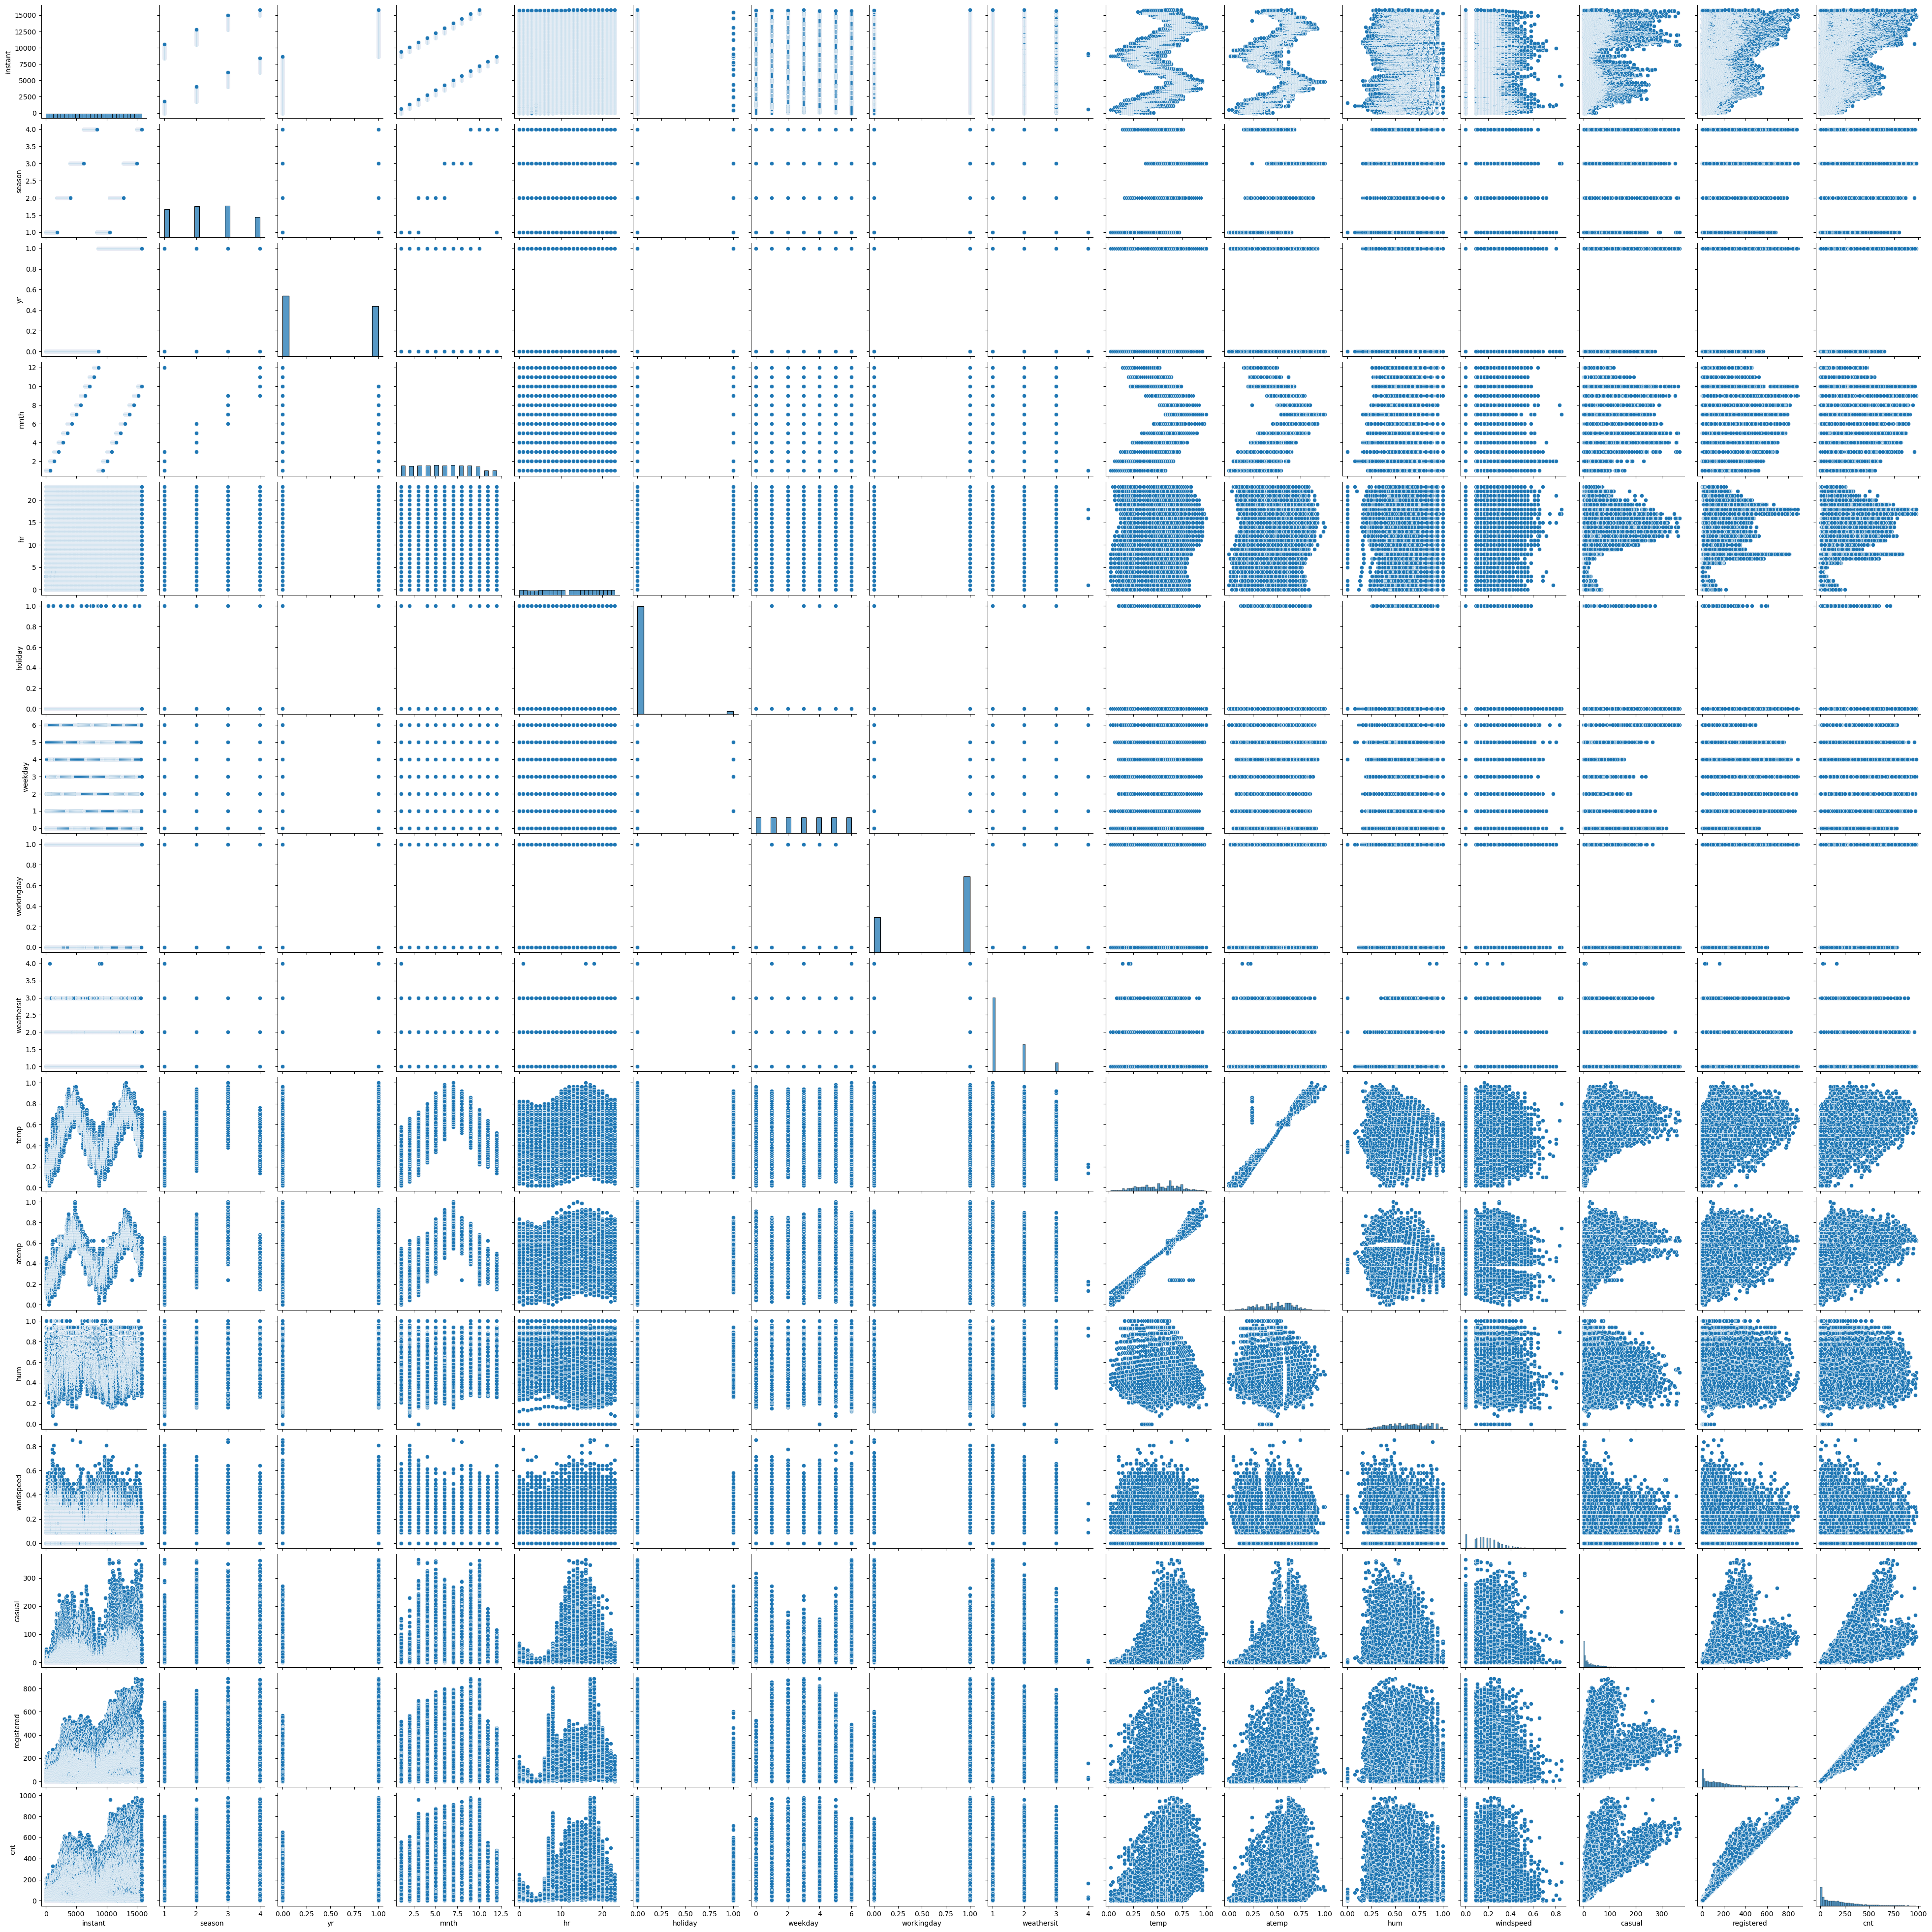

In [14]:
sns.pairplot(df)

In [13]:
Q1=df.copy()
Q1= Q1.iloc[0:100,:]
Q1

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0         1  01-01-2011       1   0     1   0        0        6           0   
1         2  01-01-2011       1   0     1   1        0        6           0   
2         3  01-01-2011       1   0     1   2        0        6           0   
3         4  01-01-2011       1   0     1   3        0        6           0   
4         5  01-01-2011       1   0     1   4        0        6           0   
..      ...         ...     ...  ..   ...  ..      ...      ...         ...   
95       96  05-01-2011       1   0     1   4        0        3           1   
96       97  05-01-2011       1   0     1   5        0        3           1   
97       98  05-01-2011       1   0     1   6        0        3           1   
98       99  05-01-2011       1   0     1   7        0        3           1   
99      100  05-01-2011       1   0     1   8        0        3           1   

    weathersit  temp   atemp   hum  windspeed  casual  registered    cnt  
0            1  0.24  0.2879  0.81     0.0000     3.0        13.0   16.0  
1            1  0.22  0.2727  0.80     0.0000     8.0        32.0   40.0  
2            1  0.22  0.2727  0.80     0.0000     5.0        27.0   32.0  
3            1  0.24  0.2879  0.75     0.0000     3.0        10.0   13.0  
4            1  0.24  0.2879  0.75     0.0000     0.0         1.0    1.0  
..         ...   ...     ...   ...        ...     ...         ...    ...  
95           1  0.24  0.2273  0.48     0.2239     0.0         2.0    2.0  
96           1  0.22  0.2273  0.47     0.1642     0.0         3.0    3.0  
97           1  0.20  0.1970  0.47     0.2239     0.0        33.0   33.0  
98           1  0.18  0.1818  0.43     0.1940     1.0        87.0   88.0  
99           1  0.20  0.1818  0.40     0.2985     3.0       192.0  195.0  

[100 rows x 17 columns]

In [14]:
Q2=df.copy()
Q2=Q2[Q2["yr"]==1]
Q2

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
8645      8646  01-01-2012       1   1     1   0        0        0   
8646      8647  01-01-2012       1   1     1   1        0        0   
8647      8648  01-01-2012       1   1     1   2        0        0   
8648      8649  01-01-2012       1   1     1   3        0        0   
8649      8650  01-01-2012       1   1     1   4        0        0   
...        ...         ...     ...  ..   ...  ..      ...      ...   
15782    15783  24-10-2012       4   1    10  19        0        3   
15783    15784  24-10-2012       4   1    10  20        0        3   
15784    15785  24-10-2012       4   1    10  21        0        3   
15785    15786  24-10-2012       4   1    10  22        0        3   
15786    15787  24-10-2012       4   1    10  23        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
8645            0           1  0.36  0.3788  0.66     0.0000     5.0   
8646            0           1  0.36  0.3485  0.66     0.1343    15.0   
8647            0           1  0.32  0.3485  0.76     0.0000    16.0   
8648            0           1  0.30  0.3333  0.81     0.0000    11.0   
8649            0           1  0.28  0.3030  0.81     0.0896     0.0   
...           ...         ...   ...     ...   ...        ...     ...   
15782           1           2  0.64  0.6212  0.53     0.0896    50.0   
15783           1           2  0.62  0.6061  0.61     0.0896    45.0   
15784           1           2  0.62  0.6061  0.61     0.1045    33.0   
15785           1           2  0.60  0.6061  0.64     0.1343    30.0   
15786           1           2  0.58  0.5455   NaN        NaN     NaN   

       registered    cnt  
8645         43.0   48.0  
8646         78.0   93.0  
8647         59.0   75.0  
8648         41.0   52.0  
8649          8.0    8.0  
...           ...    ...  
15782       522.0  572.0  
15783       396.0  441.0  
15784       280.0  313.0  
15785       208.0  238.0  
15786         NaN    NaN  

[7142 rows x 17 columns]

In [15]:
Q3=df.copy()
imp=["cnt","temp","weathersit","workingday","hr"]
Q3=Q3[imp]
Q3

cnt  temp  weathersit  workingday  hr
0       16.0  0.24           1           0   0
1       40.0  0.22           1           0   1
2       32.0  0.22           1           0   2
3       13.0  0.24           1           0   3
4        1.0  0.24           1           0   4
...      ...   ...         ...         ...  ..
15782  572.0  0.64           2           1  19
15783  441.0  0.62           2           1  20
15784  313.0  0.62           2           1  21
15785  238.0  0.60           2           1  22
15786    NaN  0.58           2           1  23

[15787 rows x 5 columns]

In [16]:
Q4=df.copy()
Q4=Q4[(Q4["weekday"]==True ) & (Q4["weathersit"]==3)]
Q4


instant      dteday  season  yr  mnth  hr  holiday  weekday  \
391        392  17-01-2011       1   0     1  19        1        1   
392        393  17-01-2011       1   0     1  20        1        1   
393        394  17-01-2011       1   0     1  21        1        1   
394        395  17-01-2011       1   0     1  22        1        1   
395        396  17-01-2011       1   0     1  23        1        1   
...        ...         ...     ...  ..   ...  ..      ...      ...   
15401    15402  08-10-2012       4   1    10  22        1        1   
15556    15557  15-10-2012       4   1    10   9        0        1   
15559    15560  15-10-2012       4   1    10  12        0        1   
15565    15566  15-10-2012       4   1    10  18        0        1   
15566    15567  15-10-2012       4   1    10  19        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
391             0           3  0.18  0.1818  0.59     0.1940     2.0   
392             0           3  0.16  0.1515  0.80     0.1940     4.0   
393             0           3  0.16  0.1515  0.80     0.1940     3.0   
394             0           3  0.14  0.1212  0.93     0.2537     0.0   
395             0           3  0.16  0.1364  0.86     0.2836     1.0   
...           ...         ...   ...     ...   ...        ...     ...   
15401           0           3  0.40  0.4091  0.76     0.2537     6.0   
15556           1           3  0.60  0.5909  0.69     0.3881    31.0   
15559           1           3  0.60  0.5758  0.78     0.3284    73.0   
15565           1           3  0.54  0.5152  0.77     0.1343    52.0   
15566           1           3  0.52  0.5000  0.83     0.0896    12.0   

       registered    cnt  
391          58.0   60.0  
392          29.0   33.0  
393          24.0   27.0  
394          13.0   13.0  
395           3.0    4.0  
...           ...    ...  
15401       101.0  107.0  
15556       328.0  359.0  
15559       211.0  284.0  
15565       540.0  592.0  
15566       227.0  239.0  

[152 rows x 17 columns]

In [40]:
Q5=df.copy()
Q5=Q5.iloc[10:150,]
Q5=Q5[Q5["windspeed"]>0.24]
Q5

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
10        11  01-01-2011       1   0     1  10        0        6           0   
11        12  01-01-2011       1   0     1  11        0        6           0   
12        13  01-01-2011       1   0     1  12        0        6           0   
13        14  01-01-2011       1   0     1  13        0        6           0   
14        15  01-01-2011       1   0     1  14        0        6           0   
15        16  01-01-2011       1   0     1  15        0        6           0   
16        17  01-01-2011       1   0     1  16        0        6           0   
17        18  01-01-2011       1   0     1  17        0        6           0   
18        19  01-01-2011       1   0     1  18        0        6           0   
19        20  01-01-2011       1   0     1  19        0        6           0   
20        21  01-01-2011       1   0     1  20        0        6           0   
23        24  01-01-2011       1   0     1  23        0        6           0   
24        25  02-01-2011       1   0     1   0        0        0           0   
25        26  02-01-2011       1   0     1   1        0        0           0   
26        27  02-01-2011       1   0     1   2        0        0           0   
29        30  02-01-2011       1   0     1   6        0        0           0   
34        35  02-01-2011       1   0     1  11        0        0           0   
35        36  02-01-2011       1   0     1  12        0        0           0   
41        42  02-01-2011       1   0     1  18        0        0           0   
42        43  02-01-2011       1   0     1  19        0        0           0   
43        44  02-01-2011       1   0     1  20        0        0           0   
44        45  02-01-2011       1   0     1  21        0        0           0   
45        46  02-01-2011       1   0     1  22        0        0           0   
47        48  03-01-2011       1   0     1   0        0        1           1   
48        49  03-01-2011       1   0     1   1        0        1           1   
49        50  03-01-2011       1   0     1   4        0        1           1   
50        51  03-01-2011       1   0     1   5        0        1           1   
51        52  03-01-2011       1   0     1   6        0        1           1   
53        54  03-01-2011       1   0     1   8        0        1           1   
54        55  03-01-2011       1   0     1   9        0        1           1   
55        56  03-01-2011       1   0     1  10        0        1           1   
56        57  03-01-2011       1   0     1  11        0        1           1   
57        58  03-01-2011       1   0     1  12        0        1           1   
58        59  03-01-2011       1   0     1  13        0        1           1   
59        60  03-01-2011       1   0     1  14        0        1           1   
60        61  03-01-2011       1   0     1  15        0        1           1   
61        62  03-01-2011       1   0     1  16        0        1           1   
78        79  04-01-2011       1   0     1  10        0        2           1   
79        80  04-01-2011       1   0     1  11        0        2           1   
83        84  04-01-2011       1   0     1  15        0        2           1   
84        85  04-01-2011       1   0     1  16        0        2           1   
99       100  05-01-2011       1   0     1   8        0        3           1   
100      101  05-01-2011       1   0     1   9        0        3           1   
101      102  05-01-2011       1   0     1  10        0        3           1   
102      103  05-01-2011       1   0     1  11        0        3           1   
103      104  05-01-2011       1   0     1  12        0        3           1   
104      105  05-01-2011       1   0     1  13        0        3           1   
136      137  06-01-2011       1   0     1  22        0        4           1   
145      146  07-01-2011       1   0     1   8        0        5           1   
146  

In [17]:
x,y=train_test_split(df,train_size=0.75,test_size=0.25)

In [18]:
x

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
3363      3364  25-05-2011       2   0     5   1        0        3   
3823      3824  13-06-2011       2   0     6   5        0        1   
6277      6278  24-09-2011       4   0     9   3        0        6   
13710    13711  30-07-2012       3   1     7  11        0        1   
8537      8538  27-12-2011       1   0    12  11        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
13555    13556  24-07-2012       3   1     7   0        0        2   
11710    11711  08-05-2012       2   1     5   3        0        2   
7284      7285  05-11-2011       4   0    11   3        0        6   
602        603  28-01-2011       1   0     1   8        0        5   
14406    14407  28-08-2012       3   1     8  11        0        2   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
3363            1           3  0.58  0.5455  0.83     0.1940     6.0   
3823            1           1  0.54  0.5152  0.64     0.3881     2.0   
6277            0           1  0.58  0.5455  0.94     0.0000     4.0   
13710           1           2  0.78  0.7273  0.55     0.1343    69.0   
8537            1           3  0.32  0.3333  0.66     0.1045     6.0   
...           ...         ...   ...     ...   ...        ...     ...   
13555           1           1  0.70  0.6667  0.74     0.1343    12.0   
11710           1           2  0.52  0.5000  0.68     0.2836     2.0   
7284            0           1  0.30  0.2727  0.52     0.2985     0.0   
602             1           2  0.16  0.1970  0.86     0.0896     2.0   
14406           1           1  0.78  0.7273  0.55     0.2537    47.0   

       registered    cnt  
3363          2.0    8.0  
3823         27.0   29.0  
6277         27.0   31.0  
13710       146.0  215.0  
8537         24.0   30.0  
...           ...    ...  
13555        52.0   64.0  
11710         4.0    6.0  
7284          8.0    8.0  
602         155.0  157.0  
14406       171.0  218.0  

[11840 rows x 17 columns]

In [19]:
y

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
13731    13732  31-07-2012       3   1     7   8        0        2   
11806    11807  12-05-2012       2   1     5   3        0        6   
12378    12379  04-06-2012       2   1     6  23        0        1   
9803      9804  18-02-2012       1   1     2  10        0        6   
7752      7753  24-11-2011       4   0    11  15        1        4   
...        ...         ...     ...  ..   ...  ..      ...      ...   
2770      2771  30-04-2011       2   0     4   8        0        6   
12505    12506  10-06-2012       2   1     6   6        0        0   
9966      9967  25-02-2012       1   1     2   7        0        6   
13651    13652  28-07-2012       3   1     7   0        0        6   
15660    15661  19-10-2012       4   1    10  17        0        5   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
13731           1           1  0.70  0.6667  0.79     0.1343    30.0   
11806           0           1  0.48  0.4697  0.59     0.0000    14.0   
12378           1           1  0.58  0.5455  0.49     0.2985     8.0   
9803            0           1  0.26  0.2727  0.81     0.1045    48.0   
7752            0           1  0.50  0.4848  0.31     0.2537    78.0   
...           ...         ...   ...     ...   ...        ...     ...   
2770            0           1  0.40  0.4091  0.54     0.2985    21.0   
12505           0           1  0.62  0.5909  0.73     0.0000     3.0   
9966            0           1  0.28  0.2424  0.45     0.4478     3.0   
13651           0           1  0.74  0.6818  0.62     0.1343    21.0   
15660           1           3  0.62  0.6061  0.69     0.3582    48.0   

       registered    cnt  
13731       730.0  760.0  
11806        20.0   34.0  
12378        78.0   86.0  
9803        157.0  205.0  
7752         71.0  149.0  
...           ...    ...  
2770         70.0   91.0  
12505        27.0   30.0  
9966         20.0   23.0  
13651       170.0  191.0  
15660       377.0  425.0  

[3947 rows x 17 columns]